#Regression & Its Evaluation | Assignment

#Question 1: What is Simple Linear Regression?

- Simple Linear Regression is a basic type of regression analysis used in Machine Learning and Statistics to find the relationship between two variables — one independent variable (X) and one dependent variable (Y).

- Simple Linear Regression helps to predict the value of a dependent variable (Y) based on the value of an independent variable (X) using a straight-line equation.

        Y = B0 + B1X

where:

Y -  Dependent variable (the value we want to predict)

X -  Independent variable (the input or predictor)

B0 - Intercept

B1 - Slope

It’s a straight line showing the best fit through all the data points — minimizing the distance (errors) between the actual data points and the line.


To find the best-fitting line (also called the line of best fit) by minimizing
the Sum of Squared Errors (SSE) — this method is called Least Squares Method.


#Question 2: What are the key assumptions of Simple Linear Regression?

1. Linearity

    - The relationship between the independent variable (X) and the dependent variable (Y) is linear.

   - This means when you plot X vs Y, the data should roughly form a straight line.
   -  Example: As study hours increase, marks increase in a roughly straight-line pattern.

2. Independence of Errors

   - The residuals (errors) — the differences between actual and predicted values — should be independent of each other.

   - No pattern or correlation should exist among residuals.
   -  This is especially important in time series data (e.g., daily sales).

3. Homoscedasticity (Constant Variance of Errors)

    - The residuals should have constant variance at all levels of X.

    - In other words, the spread of errors should be the same for small and large values of X.
    - If the spread increases or decreases, it’s called heteroscedasticity.

 4. Normality of Errors

    - The residuals (errors) should be normally distributed.
    - This helps in making valid confidence intervals and hypothesis tests.

5. No Multicollinearity

   - This applies more to multiple linear regression, but in SLR it means:
   - There should be only one independent variable, and it should not be a combination of other variables.    


#Question 3: What is heteroscedasticity, and why is it important to address in regression models?


- Heteroscedasticity means that the variance of the errors (residuals) in a regression model is not constant across all levels of the independent variable(s).

 - Example:

   - Suppose you’re predicting income (Y) based on education level (X).

   - For people with low education, income values might cluster tightly (small error).

   - For people with higher education, income values might vary widely (large error).

   - That uneven spread of errors = heteroscedasticity.

- How to Detect Heteroscedasticity:

1. Residual Plot:

   - Plot residuals vs. predicted values → look for patterns.

2. Statistical Tests:

   - Breusch–Pagan test

   - White test

3. Visual clue:

   - Funnel shape or increasing spread = heteroscedasticity.   

- How to Fix It:

1. Transform variables:

   - Use log, square root, or Box-Cox transformations on Y or X.

2. Use Weighted Least Squares (WLS):

   - Gives different weights to observations based on variance.

3. Use robust standard errors:

   - Adjusts standard errors to handle heteroscedasticity without changing coefficients.

#Question 4: What is Multiple Linear Regression?   

- Multiple Linear Regression (MLR) is an extension of Simple Linear Regression that uses two or more independent variables (X₁, X₂, X₃, …) to predict a dependent variable (Y).

- It helps understand how several factors together affect an outcome.

- To find the best-fitting plane (or hyperplane in higher dimensions) that minimizes the difference between predicted and actual Y values — done using the Least Squares Method.

- EQUATION:

        Y = b0 + b1x1 + b2x2 ----- bnxn

- Assumptions (Same as SLR + one extra):

   - Linear relationship between dependent and independent variables.

   - Independence of errors.

   - Homoscedasticity (constant variance of errors).

   - Normal distribution of residuals.

   - No multicollinearity — independent variables shouldn’t be highly correlated with each other.

- USES-:

   -  Helps analyze the impact of multiple factors at once.

   - Useful for forecasting and optimization in business, science, and economics.

#Question 5: What is polynomial regression, and how does it differ from linear regression?

- Polynomial Regression is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an nth-degree polynomial.

- it allows you to fit a curved (nonlinear) line to the data instead of a straight one.

- Equation:

         Y = b0 + b1x^2 + b2x^3-----bnx^3 + e

y = dependant variable

x = independant variable

n = degree of polynomial

e = error

- DIFFERENCES

1. IN linear regression it's relationship time is straight line whereas in polynomial regression it's curved line.

2. In linear it's nature is Linear in X , whereas in polynomial regression it's nature is non-linear in X.

3. In linear it's model is simple, whereas in polynomial it's model is more flexible and complex.

- Advantages:

   - Can model complex, curved relationships
   - Improves fit for nonlinear data

- Disadvantages:

   -  Risk of overfitting (especially with high-degree polynomials)
    -  Harder to interpret coefficients


#Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.



Intercept (b0): 0.18
Slope (b1): 1.98


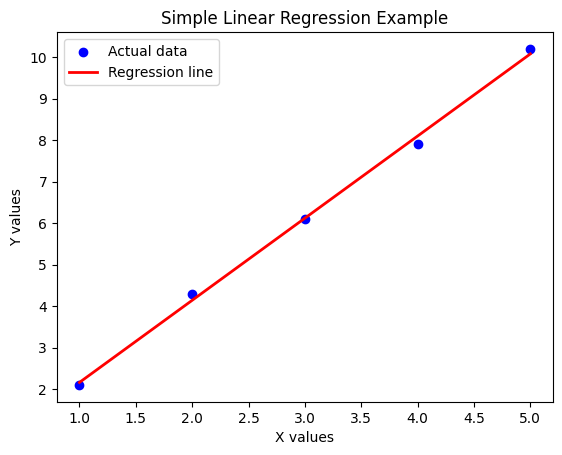

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])
model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Slope (b1): {model.coef_[0]:.2f}")

plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression line')

plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Simple Linear Regression Example")
plt.legend()
plt.show()


#Question 7: Fit a Multiple Linear Regression model on this sample data:
#● Area = [1200, 1500, 1800, 2000]
#● Rooms = [2, 3, 3, 4]
#● Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)
X = df[['Area', 'Rooms']]
Y = df['Price']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Tue, 14 Oct 2025   Prob (F-statistic):             0.0377
Time:                        17:43:04   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#Question 8: Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.


Intercept (b0): 0.060
Coefficients (b1, b2): 1.940, 0.200


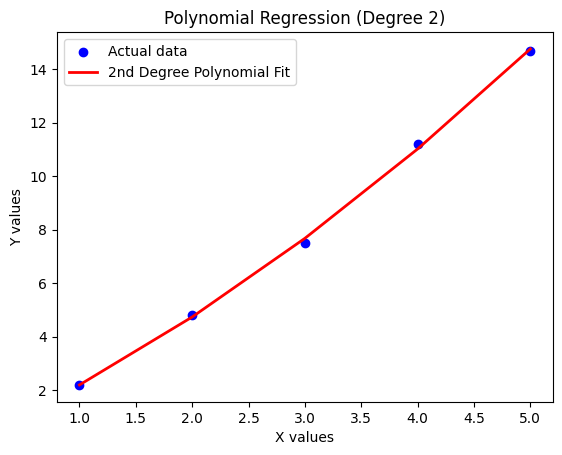

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

print(f"Intercept (b0): {model.intercept_:.3f}")
print(f"Coefficients (b1, b2): {model.coef_[1]:.3f}, {model.coef_[2]:.3f}")

plt.scatter(X, Y, color='blue', label='Actual data')

plt.plot(X, Y_pred, color='red', linewidth=2, label='2nd Degree Polynomial Fit')

plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


#Question 9: Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals.


Intercept (b0): 6.50
Slope (b1): 1.15
Residuals: [-3.   5.5 -1.  -2.5  1. ]


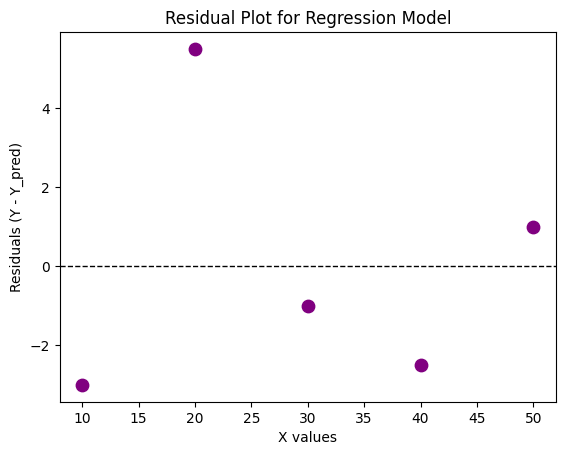

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

residuals = Y - Y_pred

print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Slope (b1): {model.coef_[0]:.2f}")
print(f"Residuals: {residuals}")

plt.scatter(X, residuals, color='purple', s=80)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("X values")
plt.ylabel("Residuals (Y - Y_pred)")
plt.title("Residual Plot for Regression Model")
plt.show()


#Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.


 1. As a data scientist predicting house prices, if I detect heteroscedasticity and multicollinearity in my regression model, I would take steps to make it more robust.

 2. To confirm these issues, I’d check a residuals vs. predicted plot and run tests like the Breusch–Pagan test for heteroscedasticity, and calculate VIF (Variance Inflation Factor) for multicollinearity.

3. To fix heteroscedasticity, I could apply transformations such as a log or square root on the target variable to stabilize variance, or use Weighted Least Squares (WLS) or robust standard errors to correct uneven error spreads.

4. For multicollinearity, I’d remove or combine highly correlated features (like Area and Rooms), or apply Ridge/Lasso Regression to penalize correlated coefficients.

5. Finally, I’d refit and validate the model to ensure assumptions are met and performance is stable. These steps would help improve the model’s accuracy, reliability, and interpretability for better house price predictions.

- STEPS TAKEN TO SOLVE ISSUES

- Step 1: Detect the Problems
   -  (a) Check for Heteroscedasticity

      - Visual method: Plot residuals vs predicted values → look for funnel or curved shapes.

      - Statistical test: Perform Breusch–Pagan or White’s test.

  - (b) Check for Multicollinearity

- Step 2: Fixing Heteroscedasticity

- Step 3: Fixing Multicollinearity

- Step 4: Rebuild and Validate the Model

- Step 5: Communicate the Results

